In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from skimage.transform import resize
%matplotlib inline

In [65]:
eyes_detector = cv2.CascadeClassifier('../resources/haarcascade_eye_tree_eyeglasses.xml')

In [38]:
def capture_frame():
    frame = None
    vc = cv2.VideoCapture(0)
    if vc.isOpened():
        _, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vc.release()
    return frame

def is_face_present(frame):
    eyes = eyes_detector.detectMultiScale(frame)
    return len(eyes) >= 2

def test_face_present():
    frame = capture_frame()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    print(f'Face present: {is_face_present(frame)}')
    
def test_given_face_present(impath):
    img_np = plt.imread(impath)
    plt.imshow(img_np)
    print(f'Face present: {is_face_present(img_np)}')

Face present: True


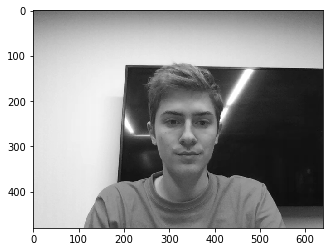

In [42]:
test_face_present()

Face present: True


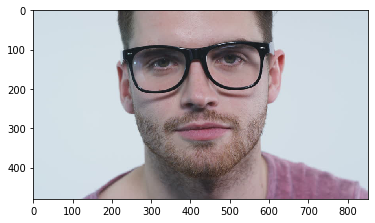

In [39]:
test_given_face_present('/Users/tomasmikeska/Desktop/glasses.jpg')

Face present: True


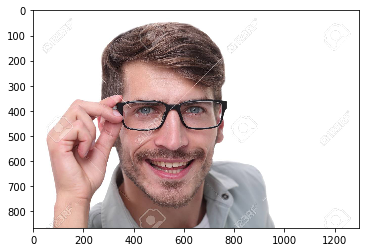

In [40]:
test_given_face_present('/Users/tomasmikeska/Desktop/glasses2.jpg')

Face present: True


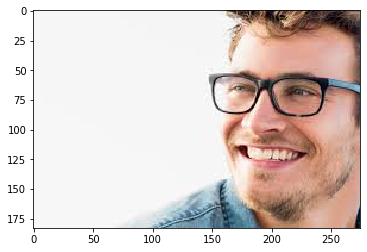

In [56]:
test_given_face_present('/Users/tomasmikeska/Desktop/glasses3.jpg')

Face present: False


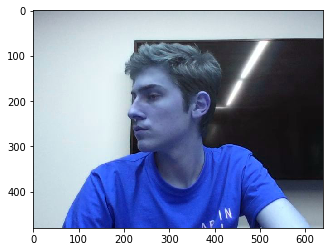

In [71]:
test_given_face_present('/Users/tomasmikeska/Desktop/test.jpg')

In [72]:
face_detector = cv2.CascadeClassifier('../resources/haarcascade_frontalcatface_extended.xml')

In [107]:
frame = capture_frame()

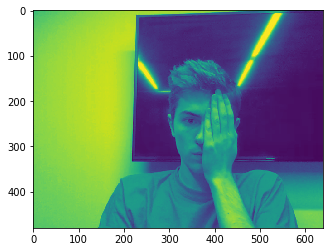

In [108]:
plt.imshow(frame)

In [82]:
import dlib

In [91]:
from PIL import Image

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('../resources/shape_predictor_68_face_landmarks.dat')

In [109]:
from imutils import face_utils

MOUTH_LEFT_CORNER = 49
MOUTH_RIGHT_CORNER = 55
EYE_LEFT = 39
EYE_RIGHT = 44

img_gray = frame
rects = detector(img_gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    landmarks = predictor(img_gray, rect)
    landmarks = face_utils.shape_to_np(landmarks)

In [111]:
landmarks[EYE_LEFT]

array([271, 173])

In [115]:
def get_eyes_center(eyes_landmarks, img_size):
    img_center_x = img_size[0] / 2
    img_center_y = img_size[1] / 2

    if len(eyes_landmarks) > 1:
        lx, ly, l_width, l_height = eyes_landmarks[0]
        rx, ry, r_width, r_height = eyes_landmarks[1]

        eyes_x_distance = rx - lx
        eyes_y_distance = ry - ly

        eyes_center_x = lx + eyes_x_distance / 2
        eyes_center_y = ly + eyes_y_distance / 2

        # Center relative
        return eyes_center_x - img_center_x, eyes_center_y - img_center_y

    elif len(eyes_landmarks) > 0:  # Only one eye detected
        x, y, width, height = eyes_landmarks[0]
        return (x + width / 2) - img_center_x, (y + height / 2) - img_center_y

    return None, None

In [120]:
get_eyes_center([[40, 60, 2, 2], [70, 50, 2, 2]], (100, 100))

(5.0, 5.0)